### This is a Markdown cell

In [4]:
!pip install spotpy

In [3]:
# A main module to run various analysis with CFE model
import os
import sys
import numpy as np
import pandas as pd
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import json

sys.path.append("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/3_model/libs/cfe/py_cfe")
import cfe
import bmi_cfe

# specify current directory create output directory if it does not exist
os.chdir("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/3_model")
os.getcwd()
out_path = '..\\4_out\\Mahurangi'
if not os.path.exists(out_path):
    os.mkdir(out_path)
data_file_path = '..\\2_data_input\\Mahurangi'

In [4]:
input_config = {
    "forcing_file": "..\\2_data_input\\Mahurangi\\full\\mahurangi_1998_2001.csv",
    "catchment_area_km2": 46.65, 
    "soil_params": {
        "bb": 14.658880935233976, # 1-3
        "mult": 1000.0,
        "satdk": 0.013447137666802389, # 1E-07-1E-05, but can be larger? 
        "satpsi": 0.09187291127012216, # 0.01-0.33
        "slop": 0.0002740918314719565, # 0-1
        "smcmax": 0.6757270053046729,  # 
        "wltsmc": 0.3689068227673663, 
        "D": 0.87,                     # fixed 
        "exponent_primary": 1.0,       # fixed
        "coeff_secondary": 1.0174974070860094,   #
        "exponent_secondary": 1.1833082840205675 #
    },
    "max_gw_storage": 221.96089432793116,        # 10-250 
    "Cgw": 0.9556998526934358,                   #
    "expon": 1.073458751801099,                  # 1-8
    "K_lf": 46.875000531249995,                  # fixed
    "K_nash": 0.22440411667008253,               #
    "nash_storage": [0.0, 0.0],                  # 
    "giuh_ordinates": [0.1, 0.35, 0.2, 0.14, 0.1, 0.06, 0.05], # 
    "refkdt": 2.325787803305572,                 # 
    "trigger_z_m": 0.8340054706423846,           # 0.01-0.87
    "fc_atm_press_fraction": 0.33,               # 0.01-0.33
    "stand_alone": 1,
    "unit_test": 1,
    "compare_results_file": "G:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\2_data_input\\Mahurangi\\full\\test_sm_basinavg.csv",
}

input_path = os.path.join(data_file_path, 'full', 'config_cfe.json')
with open(input_path, 'w') as outfile:
    json.dump(input_config, outfile)

with open(input_path) as outfile:
    loaded_data = json.load(outfile)

cfe_instance = bmi_cfe.BMI_CFE(input_path)
cfe_instance.initialize()

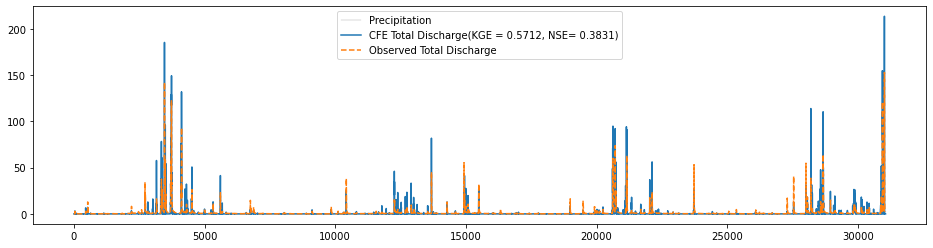

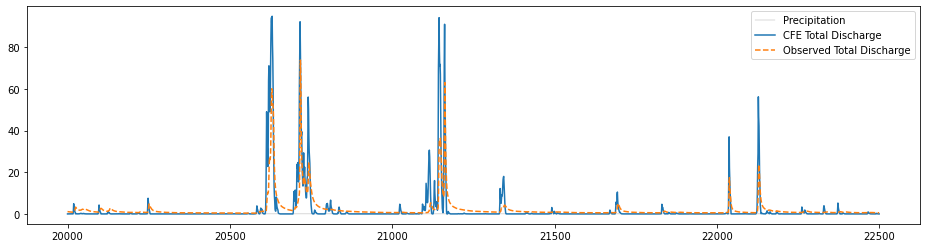

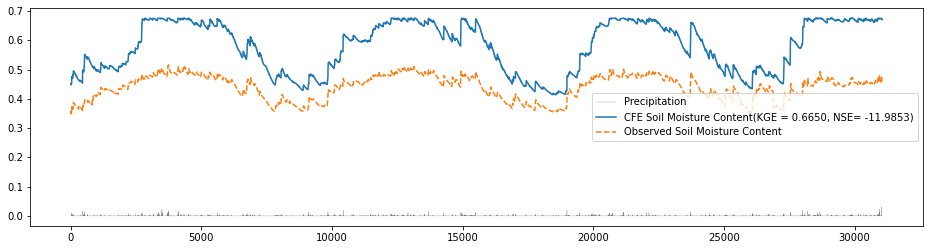

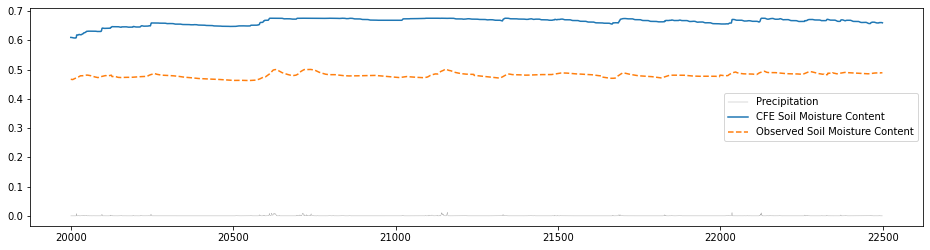

In [5]:
cfe_instance.run_unit_test(plot=True, print_fluxes=False)
cfe_instance.finalize()